In [409]:
# imorting libraries

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [411]:
# reading dataset

In [412]:
df=pd.read_excel("/users/akshay/downloads/Admission.xlsx")

In [413]:
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


### a.	What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)

In [414]:
# shape of the dataset
print("Shape of the dataset is {} rows and {} columns" .format(len(df),len(df.columns)))

Shape of the dataset is 391 rows and 19 columns


In [415]:
# data types in the data set
dtypes=pd.DataFrame(df.dtypes,columns=["Data Types"])
dtypes

,Data Types
SlNo,int64
Gender,object
Percent_SSC,float64
Board_SSC,object
Percent_HSC,float64
Board_HSC,object
Stream_HSC,object
Percent_Degree,float64
Course_Degree,object
Experience_Yrs,int64


- int or continous columns
    - 'SlNo' 
    - 'Percent_SSC' 
    - 'Percent_HSC'
    - 'Percent_Degree'
    - 'Experience_Yrs' '
    - 'Percentile_ET' 
    - 'Percent_MBA'
    - 'Marks_Communication'
    - 'Marks_Projectwork'
    - 'Marks_BOCA'
    - 'Salary'
    
- Categorical columns
    - 'Gender'  
    - 'Board_SSC' 
    - 'Board_HSC' 
    - 'Stream_HSC' 
    - 'Course_Degree'
    - 'Entrance_Test' 
    - 'Specialization_MBA'
    - 'Placement'

### b.Calculate five-point summary for numerical variables

In [416]:
describe=df.describe(include =['float', 'int'])
describe.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391,391,391,391,391,391,391,391,391,391,391
mean,196,64.6524,63.7953,62.9836,0.478261,54.935,61.6677,60.5396,68.3632,64.3785,219078
std,113.016,10.9604,11.4177,8.91615,0.667112,31.1683,5.8544,8.82408,7.1451,9.58283,138312
min,1,37,40,35,0,0,50.83,50,50,50,0
25%,98.5,56,54,57.525,0,41.19,57.195,53,64,57,172800
50%,196,64.5,63,63,0,62,61.01,58,69,63,240000
75%,293.5,74,72,69,1,78,66.02,67,74,72.5,300000
max,391,87.2,94.7,89,3,98.69,77.89,88,87,96,940000



### c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [417]:
df.describe(include=["O"])

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,8,3,2
top,M,Others,Others,Commerce,Management,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,265,222,312


- Categorical columns
    - 'Gender'  ---> 2 categories
    - 'Board_SSC' ---> 3 categories
    - 'Board_HSC'  --->3 categories
    - 'Stream_HSC'  ---> 3 categories
    - 'Course_Degree' --->7 categories
    - 'Entrance_Test'  --->8 categories
    - 'Specialization_MBA' --->3 categories
    - 'Placement' --->2 categories

In [418]:
# checking unique values in the categorical columns
cols=df.select_dtypes(include="object")
for col in cols:
    print(col)
    print("="*80)
    unique=df[col].unique()
    print(unique)
    print("="*80)

Gender
['M' 'F']
Board_SSC
['Others' 'ICSE' 'CBSE']
Board_HSC
['Others' 'CBSE' 'ISC']
Stream_HSC
['Commerce' 'Science' 'Arts']
Course_Degree
['Science' 'Computer Applications' 'Engineering' 'Management' 'Commerce'
 'Others' 'Arts']
Entrance_Test
['MAT' nan 'K-MAT' 'CAT' 'PGCET' 'GCET' 'G-MAT' 'XAT' 'G-SAT']
Specialization_MBA
['Marketing & HR' 'Marketing & Finance' 'Marketing & IB']
Placement
['Placed' 'Not Placed']


- we can see that dataset does not consist any duplicate values

- Check for defects in the data. Perform necessary actions to ‘fix’ these defects 
  Some pointers which would help you, but don’t be limited by these





### 3a.	Do variables have missing/null values?

In [419]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
SlNo,0,0
Gender,0,0
Percent_SSC,0,0
Board_SSC,0,0
Percent_HSC,0,0
Board_HSC,0,0
Stream_HSC,0,0
Percent_Degree,0,0
Course_Degree,0,0
Experience_Yrs,0,0


- As we can see that only 1 column ha missing values
    - `Entrance_Test` has 17.13% missing values 
    - As it is categorical variable we will fill the missing values with mode of the column which is MAT
    - And We will keep only four categories MAT,K-MAT,CAT and all other exams as others

In [420]:
# missing value treatmeant
df["Entrance_Test"]=df["Entrance_Test"].fillna(df["Entrance_Test"].mode()[0])
# replacing values
df["Entrance_Test"]=df["Entrance_Test"].replace({"PGCET":"Others","GCET":"Others","G-MAT":"Others","XAT":"Others",
                                                 "G-SAT":"Others"})

### 3b.Do variables have outliers?

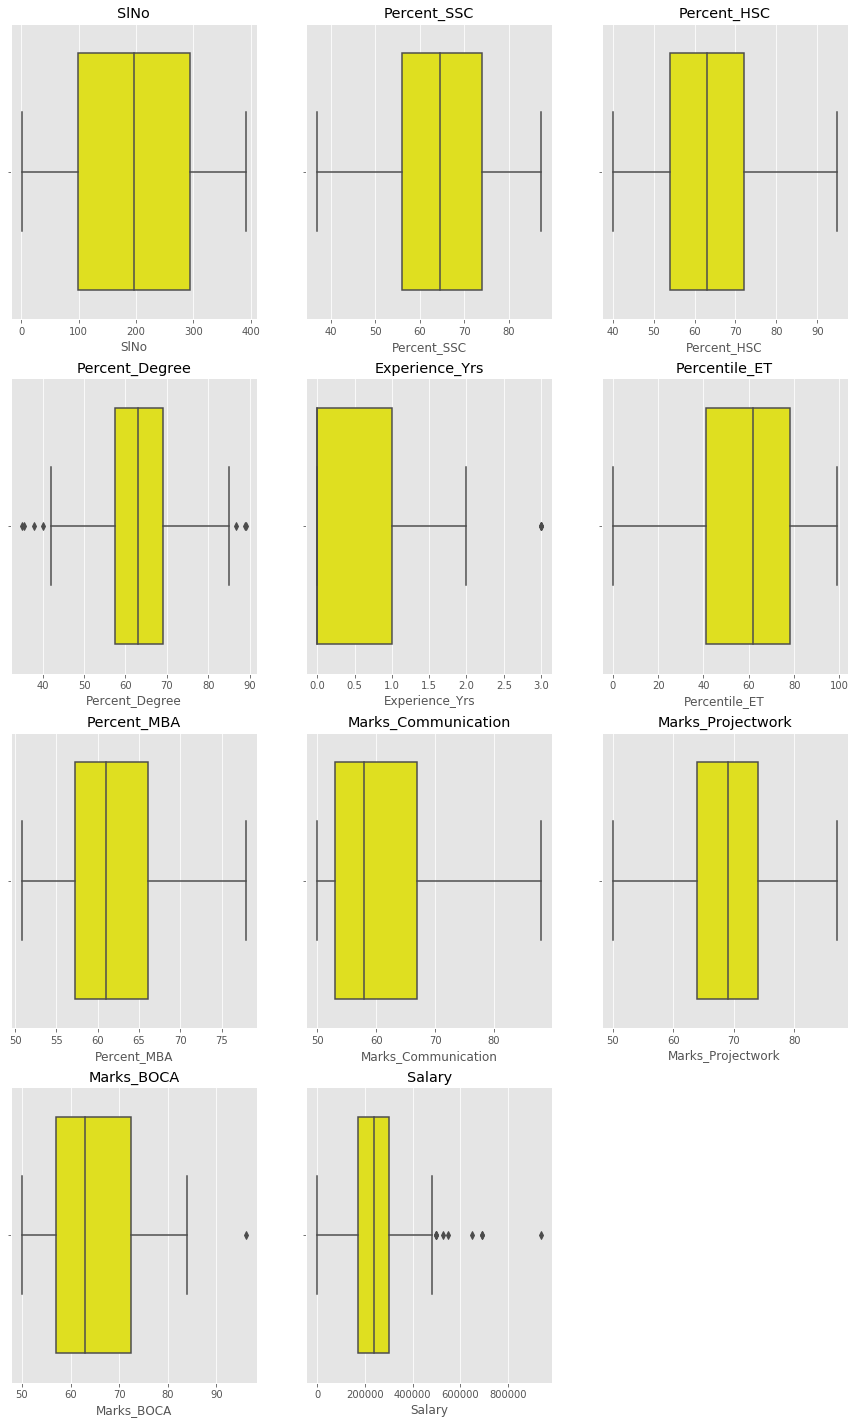

In [421]:
# chceking for outliers if any
box_cols=df.select_dtypes(exclude="O")
q=1
plt.figure(figsize=(15,25))
for i in box_cols:
    plt.subplot(4,3,q)
    plt.title(i)
    sns.boxplot(df[i],color="Yellow")
    q+=1
plt.show()

- As we can see that most of the features do not have outliers except `salary` and `Percent_degree`
- `Marks_BOCA` and `Experiance_yrs` has 1 or 2 outliers

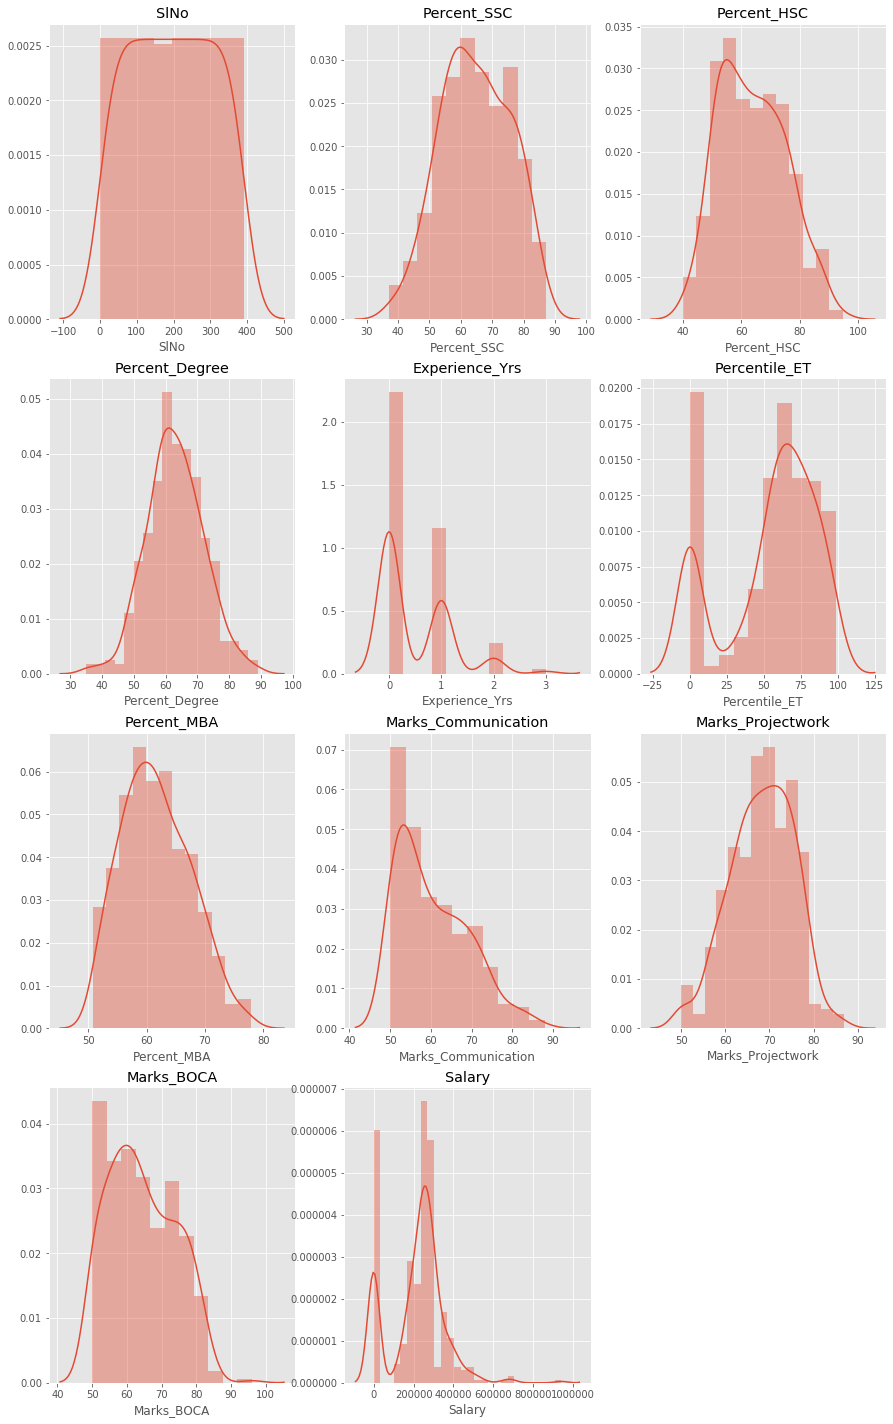

In [422]:
# chceking for outliers if any
box_cols=df.select_dtypes(exclude="O")
q=1
plt.figure(figsize=(15,25))
for i in box_cols:
    plt.subplot(4,3,q)
    plt.title(i)
    sns.distplot(df[i])
    q+=1
plt.show()

### 3c. Is the target variable normally distributed? If yes, rectify it.

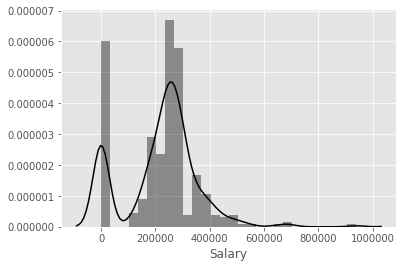

In [423]:
sns.distplot(df["Salary"],color="Black")

- there is spike on zero as the salaries of the students which are not placed is 0x
- we have to remove the records of students which are not placed as we cannot predict the salaries of students which are not placed
- there are 79 such records


### 4.	Summarize relationships among variables             

### a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

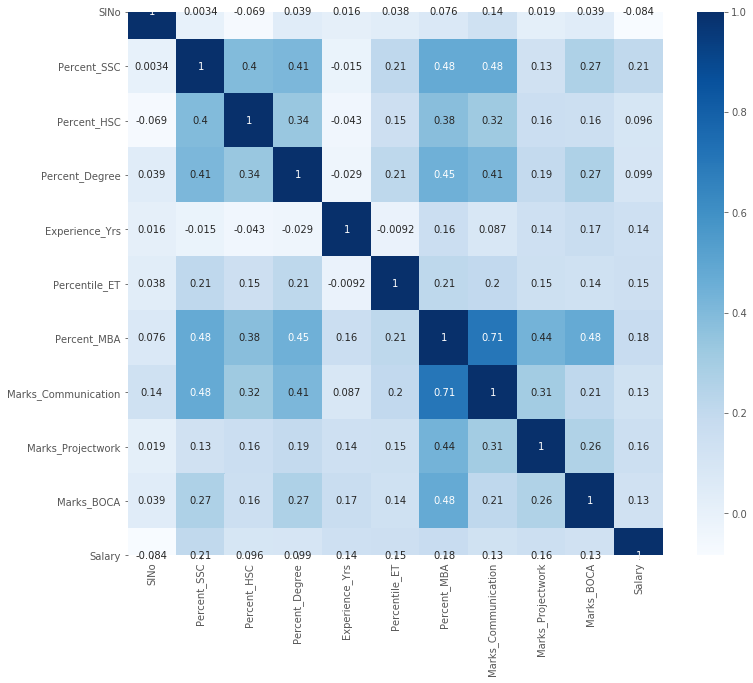

In [424]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

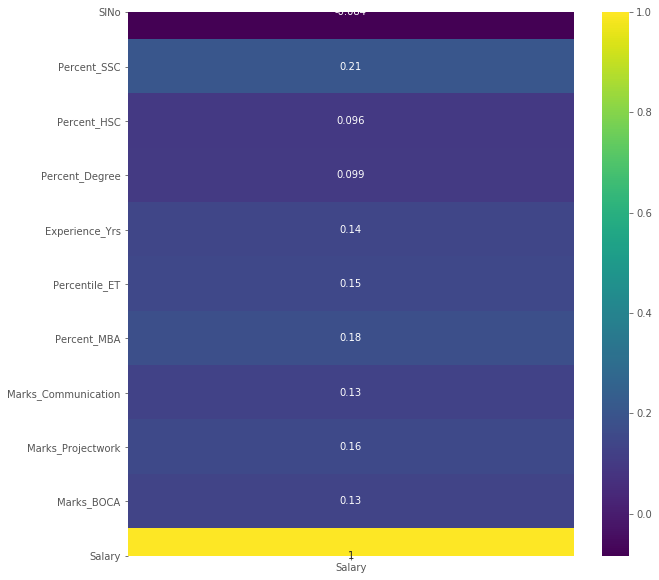

In [425]:
# correlation with respect to dependent variable
plt.figure(figsize=(10,10))
corr=pd.DataFrame(df.corr()["Salary"])
sns.heatmap(corr,annot=True,cmap='viridis')

- In this method, filtering is done using correlation matrix and it is commonly done using Pearson correlation.
- The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

### b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

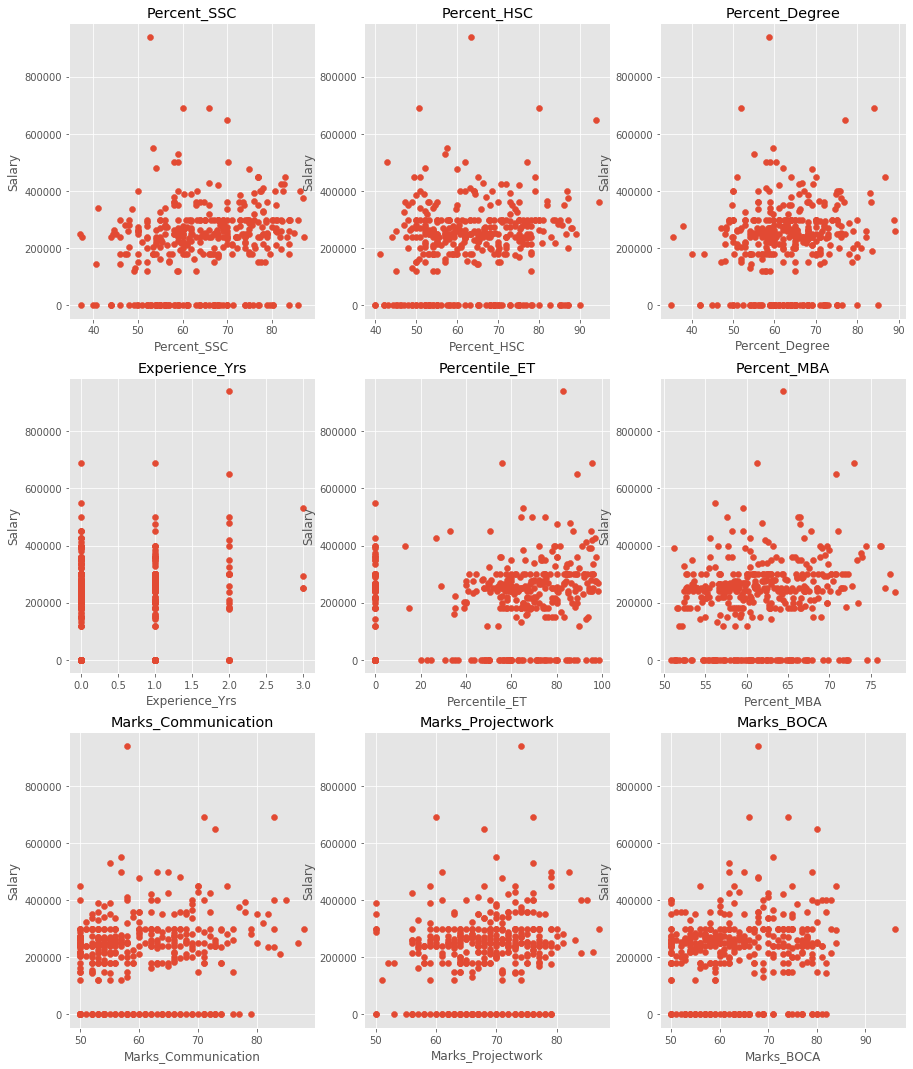

In [426]:
# plotting all the dependent variables with target variable
# plotting scatter plot of continous variable with target variable
num_cols=['Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA']
q=1
plt.figure(figsize=(15,25))
for i in num_cols:
    plt.subplot(4,3,q)
    plt.title(i)
    plt.scatter(df[i],df["Salary"])
    plt.xlabel(i)
    plt.ylabel("Salary")
    q+=1
plt.show()
    

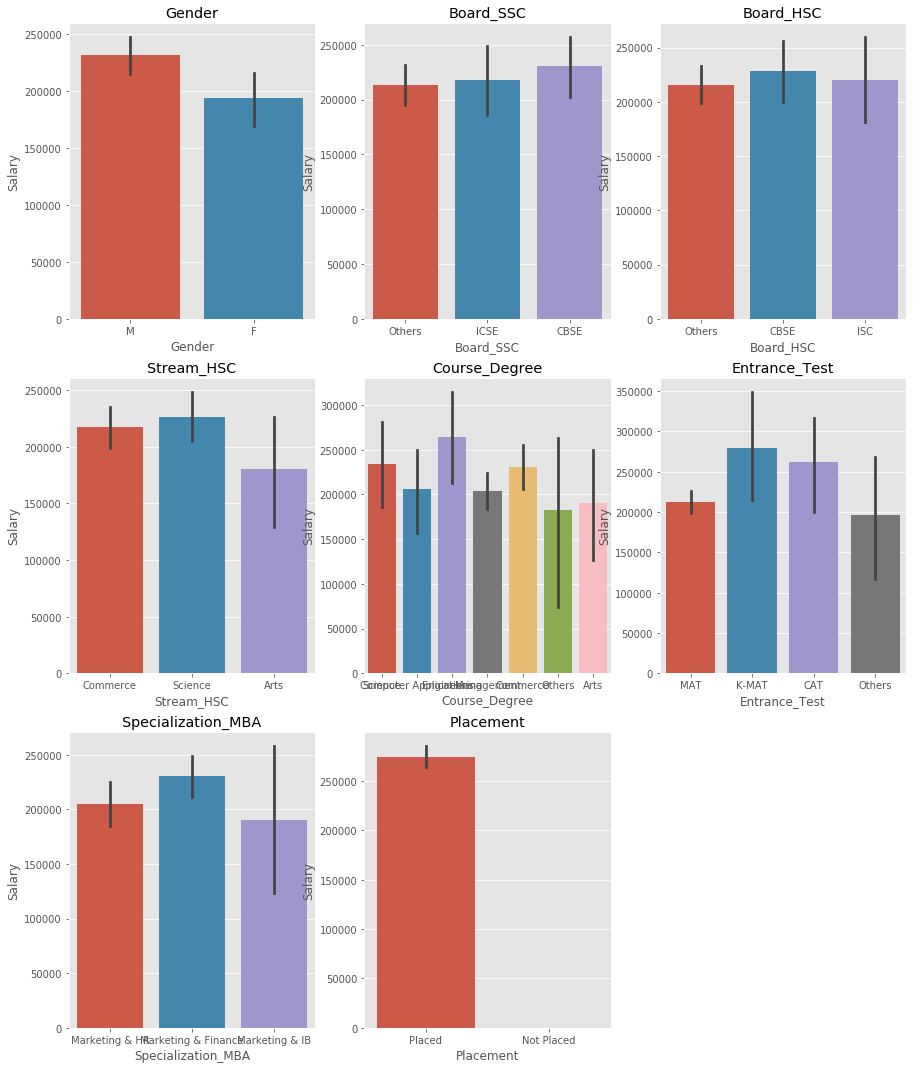

In [427]:
# plotting all the dependent variables with target variable
# plotting bar plot of categorical variable with target variable
cat_cols=['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree',
       'Entrance_Test', 'Specialization_MBA',"Placement"]
q=1
plt.figure(figsize=(15,25))
for i in cat_cols:
    plt.subplot(4,3,q)
    plt.title(i)
    sns.barplot(df[i],df["Salary"])
    plt.xlabel(i)
    plt.ylabel("Salary")
    q+=1
plt.show()

### 5 Split dataset into train and test (70:30) 



In [428]:
# converting all the dataset into numerical type by converting object columns into dummies
df=pd.get_dummies(df,columns=['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree',
       'Entrance_Test', 'Specialization_MBA',"Placement"],drop_first=True)

In [429]:
from sklearn.model_selection import train_test_split
X=df.drop(["Salary","SlNo"],axis=1)
y=pd.DataFrame(df["Salary"])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

### 5a.	Are both train and test representative of the overall data? How would you ascertain this statistically?

In [430]:
from scipy import stats
ttest_1samp=stats.ttest_1samp
print('train',ttest_1samp(y_train,df.Salary.mean()))
print('test',ttest_1samp(y_test,df.Salary.mean()))

train Ttest_1sampResult(statistic=array([-0.47489194]), pvalue=array([0.63524507]))
test Ttest_1sampResult(statistic=array([0.67318628]), pvalue=array([0.50215635]))


### 6. Fit a base model. Please write your key observations 

In [431]:
# MODEL USING OLS
Xc = sm.add_constant(X_train)
lin_reg_ols = sm.OLS(y_train,Xc).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     27.43
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.38e-60
Time:                        13:37:46   Log-Likelihood:                -3418.3
No. Observations:                 273   AIC:                             6895.
Df Residuals:                     244   BIC:                             6999.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -1.62e+05   7.14e+04     -2.271      0.024   -3.03e+05   -2.15e+04
Percent_SSC                           188.1486    545.690      0.345      0.731    -886.715    1263.013
Percent_HSC                          -387.0627    519.790     -0.745      0.457   -1410.911     636.785
Percent_Degree                        234.2633    636.538      0.368      0.713   -1019.546    1488.073
Experience_Yrs                       9673.4643   6608.004      1.464      0.145   -3342.545    2.27e+04
Percentile_ET                         -51.8217    146.061     -0.355      0.723    -339.524     235.881
Percent_MBA                           991.1004   1321.983      0.750      0.454   -1612.854    3595.055
Marks_Communication                  1333.8364    767.469      1.738      0.083    -177.873    2845.545
Marks_Projectwork                     -68.6634    707.124     -0.097      0.923   -1461.510    1324.184
Marks_BOCA                            951.2196    565.443      1.682      0.094    -162.553    2064.992
Gender_M                             3.315e+04   9974.865      3.324      0.001    1.35e+04    5.28e+04
Board_SSC_ICSE                      -4.146e+04   1.63e+04     -2.547      0.011   -7.35e+04   -9392.588
Board_SSC_Others                    -3.083e+04   1.43e+04     -2.161      0.032   -5.89e+04   -2732.283
Board_HSC_ISC                        4.533e+04   1.87e+04      2.424      0.016    8498.537    8.22e+04
Board_HSC_Others                     2.518e+04   1.47e+04      1.711      0.088   -3801.482    5.42e+04
Stream_HSC_Commerce                  3.824e+04   2.51e+04      1.525      0.129   -1.12e+04    8.76e+04
Stream_HSC_Science                    3.49e+04   2.64e+04      1.323      0.187    -1.7e+04    8.68e+04
Course_Degree_Commerce              -3.314e+04   2.76e+04     -1.200      0.231   -8.75e+04    2.13e+04
Course_Degree_Computer Applications -5.548e+04   2.91e+04     -1.909      0.057   -1.13e+05    1778.614
Course_Degree_Engineering            -1.66e+04   2.88e+04     -0.577      0.564   -7.33e+04    4.01e+04
Course_Degree_Management            -5.922e+04    2.6e+04     -2.275      0.024    -1.1e+05   -7948.576
Course_Degree_Others                -4.862e+04    4.1e+04     -1.186      0.237   -1.29e+05    3.21e+04
Course_Degree_Science                -4.47e+04   3.09e+04     -1.448      0.149   -1.06e+05    1.61e+04
Entrance_Test_K-MAT                  3.939e+04   2.63e+04      1.498      0.135   -1.24e+04    9.12e+04
Entrance_Test_MAT                   -4.782e+04   1.96e+04     -2.440      0.015   -8.64e+04   -9217.656
Entrance_Test_Others                -1.688e+04   3.05e+04     -0.554      0.580   -7.69e+04    4.31e+04
Specialization_MBA_Marketing & HR    -1.54e+04   9664.365     -1.59

### 6a.	What is the overall R2? Please comment on whether it is good or not. 

- Overall R2 score of ols model is 75% which can be improved

### 6b.	What is the adjusted R2? Is it different from R2? Why?

- Meaning of Adjusted R2 Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

### 6c.	Which variables are significant?

Out of 28 features, best number of features 21
['Experience_Yrs' 'Marks_Communication' 'Gender_M' 'Board_SSC_ICSE'
 'Board_SSC_Others' 'Board_HSC_ISC' 'Board_HSC_Others'
 'Stream_HSC_Commerce' 'Stream_HSC_Science' 'Course_Degree_Commerce'
 'Course_Degree_Computer Applications' 'Course_Degree_Engineering'
 'Course_Degree_Management' 'Course_Degree_Others' 'Course_Degree_Science'
 'Entrance_Test_K-MAT' 'Entrance_Test_MAT' 'Entrance_Test_Others'
 'Specialization_MBA_Marketing & HR' 'Specialization_MBA_Marketing & IB'
 'Placement_Placed']


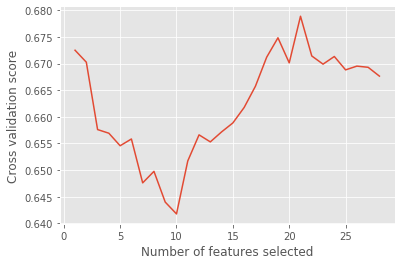

In [433]:
model = LinearRegression(fit_intercept=False)
selector = RFECV(model,cv=5)
selector = selector.fit(X_train, y_train)
print(f"Out of {len(X_train.columns)} features, best number of features {selector.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X_train.columns) + 1), selector.grid_scores_)
print(X_train.columns[selector.support_].values)
plt.show()

- we can see that out of 28 variables only 21 variables are significant
- Significant variables :
- ['Experience_Yrs' 'Marks_Communication' 'Gender_M' 'Board_SSC_ICSE'
 'Board_SSC_Others' 'Board_HSC_ISC' 'Board_HSC_Others'
 'Stream_HSC_Commerce' 'Stream_HSC_Science' 'Course_Degree_Commerce'
 'Course_Degree_Computer Applications' 'Course_Degree_Engineering'
 'Course_Degree_Management' 'Course_Degree_Others' 'Course_Degree_Science'
 'Entrance_Test_K-MAT' 'Entrance_Test_MAT' 'Entrance_Test_Others'
 'Specialization_MBA_Marketing & HR' 'Specialization_MBA_Marketing & IB'
 'Placement_Placed']

### 6d.	Is there multicollinearity?

In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).sort_values(by="vif",ascending=False)


,vif
Stream_HSC_Science,9.194628
Course_Degree_Management,8.861678
Course_Degree_Commerce,8.825876
Stream_HSC_Commerce,8.595190
Course_Degree_Computer Applications,4.314301
Course_Degree_Engineering,3.954860
Percent_MBA,3.260472
Course_Degree_Science,3.087967
Board_HSC_Others,2.897042
Board_SSC_Others,2.804473


- There is multicollinearity present between some features where vif >5.
- We can even use PCA to reduce features to a smaller set of uncorrelated components.
- To deal with multicollinearity we should iteratively remove features with high values of VIF.

### 6e.	Which other key model output parameters do you want to look at? 

In [435]:
print("Key model Output parameters for linear regression")
print("-"*50)
print(f'Coefficients for linear regression:\n {lin_reg.coef_}')
print("-"*50)
print(f'Intercept for linear regression: {lin_reg.intercept_}')
print("-"*50)
print("Key model Output parameters for Random forest")
print("-"*50)
print("important features in random forest :\n",model1.feature_importances_)
print("-"*50)


Key model Output parameters for linear regression
--------------------------------------------------
Coefficients for linear regression:
 [[ 1.88148624e+02 -3.87062671e+02  2.34263258e+02  9.67346429e+03
  -5.18216859e+01  9.91100428e+02  1.33383636e+03 -6.86633777e+01
   9.51219613e+02  3.31522498e+04 -4.14623996e+04 -3.08273371e+04
   4.53347861e+04  2.51790626e+04  3.82355455e+04  3.48991586e+04
  -3.31402380e+04 -5.54800633e+04 -1.65969345e+04 -5.92165447e+04
  -4.86189168e+04 -4.46961737e+04  3.93860621e+04 -4.78195957e+04
  -1.68844307e+04 -1.54017398e+04 -1.06425610e+04  2.62076510e+05]]
--------------------------------------------------
Intercept for linear regression: [-162047.59523877]
--------------------------------------------------
Key model Output parameters for Random forest
--------------------------------------------------
important features in random forest :
 [0.04148717 0.11335743 0.01220897 0.01948921 0.00677213 0.01303075
 0.01214347 0.00654945 0.00833779 0.01352

### 7. How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 


- we will try to use other algorithms and see if the model acuracy increases or not


In [437]:
# MODEL USING LINEAR REGRESSION
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
lin_reg_y_pred=model.predict(X_test)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7588791858536211
R^2 score for test: 0.569970049058983


In [438]:
# MODEL USING RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model1 = rf.fit(X_train,y_train)
rf_y_pred=model.predict(X_test)
print(f'R^2 score for train: {rf.score(X_train, y_train)}')
print(f'R^2 score for test: {rf.score(X_test, y_test)}')

R^2 score for train: 0.9400118183169056
R^2 score for test: 0.5468732173828594


In [439]:
# model usning only significant varibles
X1=df[['Experience_Yrs','Marks_Communication', 'Gender_M' ,'Board_SSC_ICSE',
 'Board_SSC_Others' ,'Board_HSC_ISC' ,'Board_HSC_Others',
 'Stream_HSC_Commerce', 'Stream_HSC_Science' ,'Course_Degree_Commerce',
 'Course_Degree_Computer Applications', 'Course_Degree_Engineering',
 'Course_Degree_Management' ,'Course_Degree_Others', 'Course_Degree_Science',
 'Entrance_Test_K-MAT' ,'Entrance_Test_MAT', 'Entrance_Test_Others',
 'Specialization_MBA_Marketing & HR', 'Specialization_MBA_Marketing & IB',
 'Placement_Placed']]
y1=df["Salary"]
X_train1, X_test1, y_train1, y_test1 = train_test_split (X1, y1, test_size=0.3, random_state=42)
Xc1 = sm.add_constant(X_train1)
lin_reg_ols1 = sm.OLS(y_train1,Xc1).fit()
lin_reg_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     36.21
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           8.40e-64
Time:                        13:38:53   Log-Likelihood:                -3422.2
No. Observations:                 273   AIC:                             6888.
Df Residuals:                     251   BIC:                             6968.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -8.394e+04   4.65e+04     -1.807      0.072   -1.75e+05    7542.992
Experience_Yrs                       1.249e+04   6444.077      1.938      0.054    -202.435    2.52e+04
Marks_Communication                  1925.8066    533.760      3.608      0.000     874.588    2977.026
Gender_M                             2.822e+04   9599.800      2.939      0.004    9309.687    4.71e+04
Board_SSC_ICSE                      -4.166e+04   1.62e+04     -2.574      0.011   -7.35e+04   -9781.743
Board_SSC_Others                    -2.851e+04   1.36e+04     -2.096      0.037   -5.53e+04   -1725.174
Board_HSC_ISC                        4.275e+04   1.86e+04      2.303      0.022    6185.381    7.93e+04
Board_HSC_Others                     2.205e+04   1.42e+04      1.548      0.123   -6002.804    5.01e+04
Stream_HSC_Commerce                  4.074e+04   2.46e+04      1.656      0.099   -7721.058    8.92e+04
Stream_HSC_Science                   4.044e+04   2.48e+04      1.632      0.104   -8374.341    8.93e+04
Course_Degree_Commerce              -3.279e+04   2.72e+04     -1.203      0.230   -8.64e+04    2.09e+04
Course_Degree_Computer Applications -4.963e+04   2.79e+04     -1.779      0.077   -1.05e+05    5328.459
Course_Degree_Engineering           -1.395e+04   2.86e+04     -0.487      0.626   -7.03e+04    4.24e+04
Course_Degree_Management            -5.973e+04   2.53e+04     -2.358      0.019    -1.1e+05   -9834.292
Course_Degree_Others                -5.062e+04   3.97e+04     -1.276      0.203   -1.29e+05    2.75e+04
Course_Degree_Science               -4.038e+04   3.04e+04     -1.330      0.185      -1e+05    1.94e+04
Entrance_Test_K-MAT                   3.66e+04   2.59e+04      1.414      0.159   -1.44e+04    8.76e+04
Entrance_Test_MAT                    -4.73e+04   1.93e+04     -2.448      0.015   -8.54e+04   -9244.462
Entrance_Test_Others                -1.252e+04      3e+04     -0.417      0.677   -7.17e+04    4.66e+04
Specialization_MBA_Marketing & HR   -1.664e+04   9437.089     -1.763      0.079   -3.52e+04    1948.157
Specialization_MBA_Marketing & IB   -1.722e+04    2.3e+04     -0.750      0.454   -6.24e+04     2.8e+04
Placement_Placed                      2.65e+05   1.06e+04     24.928      0.000    2.44e+05    2.86e+05
==============================================================================
Omnibus:                       77.590   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.281
Skew:                           1.191   Prob(JB):                     6.75e-58
Kurtosis:                       7.180   Cond. No.                         930.
==============================================================================

Warnings

In [440]:
# model usinf using backward elimination
X=df.drop(["Salary","SlNo"],axis=1)
y=df["Salary"]
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Experience_Yrs', 'Marks_Communication', 'Marks_BOCA', 'Gender_M', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed']


- select features using backward elimination are
- ['Experience_Yrs', 'Marks_Communication', 'Marks_BOCA', 'Gender_M', 'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR', 'Placement_Placed']
- so building model on this features

In [441]:
X=X[['Experience_Yrs', 'Marks_Communication', 'Marks_BOCA', 'Gender_M', 'Entrance_Test_MAT', 
     'Specialization_MBA_Marketing & HR', 'Placement_Placed']]
y=df["Salary"]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
Xc = sm.add_constant(X_train)
lin_reg_ols = sm.OLS(y_train,Xc).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     102.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.16e-71
Time:                        13:38:55   Log-Likelihood:                -3433.6
No. Observations:                 273   AIC:                             6883.
Df Residuals:                     265   BIC:                             6912.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1.491e+05   4.43e+04     -3.367      0.001   -2.36e+05   -6.19e+04
Experience_Yrs                     1.107e+04   6280.828      1.763      0.079   -1295.911    2.34e+04
Marks_Communication                1733.6047    518.222      3.345      0.001     713.247    2753.962
Marks_BOCA                         1180.2127    476.088      2.479      0.014     242.816    2117.610
Gender_M                           3.271e+04   9541.351      3.428      0.001    1.39e+04    5.15e+04
Entrance_Test_MAT                 -5.618e+04   1.22e+04     -4.616      0.000   -8.01e+04   -3.22e+04
Specialization_MBA_Marketing & HR -1.425e+04   8917.959     -1.598      0.111   -3.18e+04    3308.364
Placement_Placed                   2.639e+05   1.07e+04     24.632      0.000    2.43e+05    2.85e+05
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.076
Skew:                           1.322   Prob(JB):                     9.23e-62
Kurtosis:                       7.209   Cond. No.                         923.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Summarizing as follows


### 1.	Summarizing the overall fit of the model and list down the measures to prove that it is a good model

- ***model using the significant variables is giving maximum accuracy which is 75% hence it can be said as good model***
- ***it is good model because the features are reducting hence reducing the complexity of the model***

### 2.business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship.

- the most affecting variables to target variabe are 
    - `Percentile_ET` and
    - `Experience_Yrs`

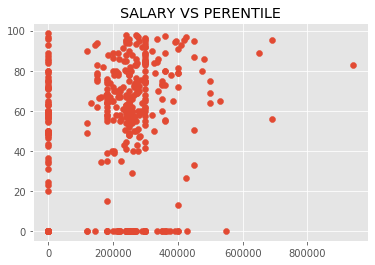

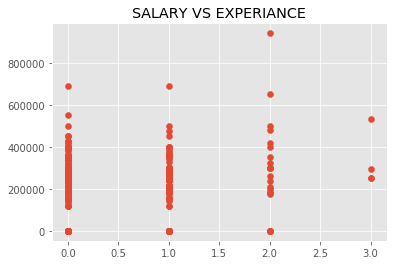

In [452]:
plt.scatter(df["Salary"],df["Percentile_ET"])
plt.title("SALARY VS PERENTILE")
plt.show()
plt.scatter(df["Experience_Yrs"],df["Salary"])
plt.title("SALARY VS EXPERIANCE")
plt.show()

- from above plots we can see that the percentile and experiance are affecting the salary 

### 3.	What changes from the base model had the most effect on model performance?

- Selecting the best features or revelant features which were affetcing the target variable `Salary` improved the mdel performance
- selecting the features using backward elemination also improved the model performance

### 4.	What are the key risks to your results and interpretation?

- key risks are presence of more unwanted variables which are not affecting the target variable